# LELA60331 Week 5 Seminar Workbook

This week we will look at regression and at model training using gradient descent.

We will start by looking at fitting linear regression models.

### Linear regression with one predictor

In this (made up) data set y is the exam results of a group of students and x is the number of hours spent studying.

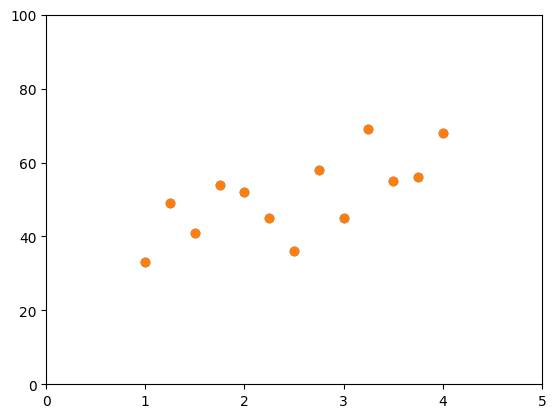

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = [1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00]
y = [33,49,41,54,52,45,36,58,45,69,55,56,68]
x = np.array(x)
y = np.array(y)

plt.scatter(x, y)
plt.ylim(0,100)
plt.xlim(0,5)
plt.scatter(x, y)

plt.show()

In linear regression we fit a line to the data that allows us to predict y from x. The equation for this is as follows (note that I using the  machine-learning term bias in place of the term intercept which is more commonly used in statistics).

y = bias + x*weight [+ error]

Let's start by setting a random weight and setting our bias to zero.

Note: Computers cannot actually generate random numbers, just numbers that appear random. So we would do better to consider the numbers generated to be pseudo-random. The algorithm deployed uses a "seed" during generation. If the seed is held constant then we will get the same "random" value each time. I set the seed here just so that everyone gets the same line and things don't get confusing. If I hadn't set this I would expect a different weight everytime I ran the code.


In [2]:
np.random.seed(1)
weight = np.random.rand(1)[0]
bias=0
weight

np.float64(0.417022004702574)

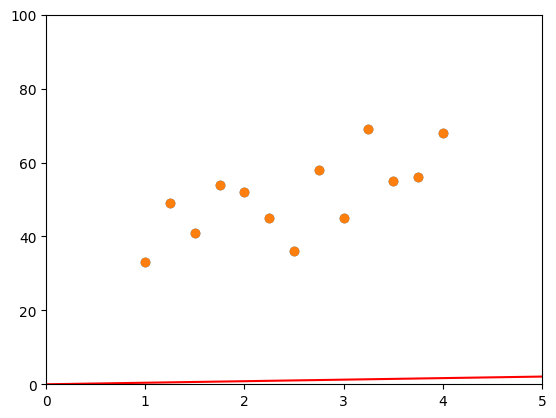

In [3]:
plt.scatter(x, y)
plt.ylim(0,100)
plt.xlim(0,5)
line_x = [0, 5]
line_y = [bias, bias+(5*weight)]

plt.scatter(x, y)
plt.plot(line_x, line_y, label='Line', color='red')  # Adding a line

plt.show()


As you can see this line isn't a very good fit to the data. If we used it for predictions we would get very bad estimates.

We will use gradient descent to fine the line of best fit. Note: it is called simply gradient descent when we update weights based on the whole data set as we will here. If we update weights based on random subsets of the data (mini-batch training) it is called stochastic gradient descent. These variants are explained in the week 7 lecture.

Gradient descent works as follows: \\
Initialise weights to e.g. random values \\
For a given number of N iterations:  \\
1. Predict each y value given x, bias and the current weight(s), giving us y_hat \\
2. Calculate the loss (for reporting/monitoring). For linear regression this is the "mean squared error". We calculate a vector of item-specific "errors" by subtracting the vector of real y values from the vector of estimated y_hat values. We then calculate the dot product of this vector with itself (the sum of the squared values) and divide that by the number of data points. \\
3. Calculate dw - the gradient of the loss function with regard to each weight. For linear regression this is the dot product of the vector of x values for the given feature and the vector of errors, divided by the number of data points in our data. \\
4. Calculate db - the gradient of the loss function with regard to the bias. For linear regression this is the sum of the vector of errors, divided by the number of data points in our data.  \\
5. Update each weight (in this first example there is only one) by setting it to be the current weight minus dw times the learning rate \\
6. Update the bias by setting it to be the current bias minus db times the learning rate \\
7. Repeat until done


Problem 1: Complete the code below so that it finds the line of best fit

Text(0, 0.5, 'loss')

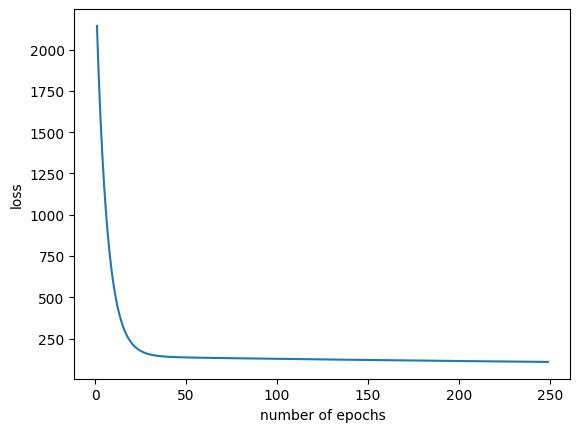

In [4]:
n_iters = 250
num_features=1
weight = np.random.rand(num_features)[0]
bias=0
linear_loss=[]

num_samples = len(y)
lr=0.01

for i in range(n_iters):
    y_est = x*weight+bias
    errors = ?
    loss = ?
    linear_loss.append(loss)

    dw = ?
    db = ?
    weight = ?
    bias = ?

plt.plot(range(1,n_iters),linear_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")

If we have done this correctly then when we use the bias and the weight to plot a line it should fit the data well

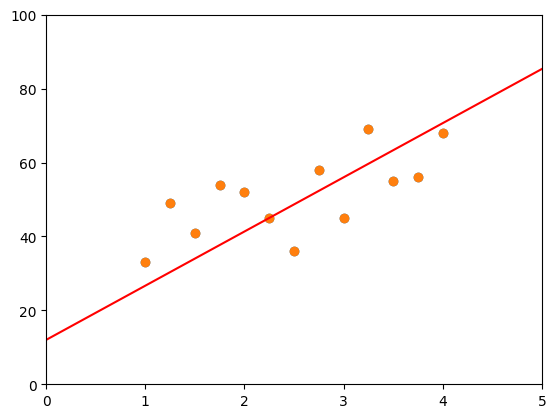

In [5]:
plt.scatter(x, y)
plt.ylim(0,100)
plt.xlim(0,5)
line_x = [0, 5]
line_y = [bias, bias+(5*weight)]

plt.scatter(x, y)
plt.plot(line_x, line_y, label='Line', color='red')  # Adding a line

plt.show()

Problem 2: Increase the learning rate to 2 and rerun your code. What do you notice? Why does this happen? \\


Problem 3. Decrease the learning rate to 0.001 and rerun your code. What do you notice? Why does this happen?


Problem 4. What is the predicted exam score for a student who studied for a) 1 hour and b) 4 hours. To calculate this you will need to know the bias and the weight which are as follows:


In [ ]:
print("BIAS: " + str(bias))
print("WEIGHT: " + str(weight))

### Linear Regression with 2 predictors

Now imagine that we acquire an additional piece of information - each student's score on a recent mock exam. We now have two features to use to make our prediction. We can plot the relationship between the variables using a bubble plot.

In [ ]:
x=[[41, 51, 35, 45, 52, 35, 31, 57, 45, 51, 60, 64, 63],[1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00]]
y = [33,49,41,54,52,45,36,58,45,69,55,56,68]
x = np.array(x)
y = np.array(y)
plt.scatter(x[0], x[1], s=np.exp(y/10), alpha=0.5)
plt.show()

Before attempting to do anything with the data we will scale the predictors so that they have a mean of zero and a standard deviation of 1. This will aid learning as weights will be on manageable scales.


In [ ]:
x[0]=(x[0]-np.mean(x[0]))/np.std(x[0])
x[1]=(x[1]-np.mean(x[1]))/np.std(x[1])

Problem 5: Complete the code below so that it finds the line of best fit. The critical difference is that we now have 2 features and therefore 2 weights to factor into our predictions and to update at each iteration

In [ ]:
n_iters = 2000
num_features = 2
weights = np.random.rand(num_features)
bias=0
num_samples = len(y)
linear_loss=[]
lr=0.025
for i in range(n_iters):
    y_est =
    errors = ?
    loss = ?
    linear_loss.append(loss)

    dw1 = ?
    dw2 = ?
    db = ?
    weights[0] = ?
    weights[1] = ?
    bias = bias - lr * db
plt.plot(range(1,n_iters),linear_loss[1:])
plt.xlabel("number of epochs")
plt.ylabel("loss")